In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
data = pd.read_csv('nypd_arrest.csv')

In [3]:
data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,206892169,12/31/2019,907.0,"IMPAIRED DRIVING,DRUG",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U4,M,M,33,0,25-44,M,WHITE,1000916,245710,40.841085,-73.939769
1,206888084,12/31/2019,739.0,"FRAUD,UNCLASSIFIED-FELONY",112.0,THEFT-FRAUD,PL 1908301,F,Q,101,0,25-44,M,BLACK HISPANIC,1055868,156522,40.596012,-73.742116
2,206890433,12/31/2019,122.0,"HOMICIDE, NEGLIGENT, VEHICLE,",102.0,HOMICIDE-NEGLIGENT-VEHICLE,PL 1251201,F,M,23,0,18-24,M,BLACK,997462,227024,40.789803,-73.952289
3,206890441,12/31/2019,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,S,120,0,18-24,M,BLACK,962822,174282,40.645023,-74.077217
4,206890973,12/31/2019,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,25,97,25-44,M,BLACK,1004138,226326,40.787875,-73.928182


In [4]:
data.drop(['ARREST_KEY', 'PD_CD', 'KY_CD', 'LAW_CODE', ], axis=1, inplace=True)

In [5]:
data.dropna(inplace=True)

In [59]:
#data.info()

In [6]:
data.rename(columns={'PD_DESC':'offenses', 'LAW_CAT_CD':'offense_type'}, inplace=True)

In [7]:
#data.PERP_RACE.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'
#data.ARREST_BORO.value_counts()
#data.PD_DESC.value_counts()[:10]
#data.ARREST_PRECINCT.value_counts()[:20]

In [7]:
data.offenses.value_counts()[:20]

ASSAULT 3                                    24513
LARCENY,PETIT FROM OPEN AREAS,               21568
TRAFFIC,UNCLASSIFIED MISDEMEAN               13624
ASSAULT 2,1,UNCLASSIFIED                     11498
ROBBERY,OPEN AREA UNCLASSIFIED                9235
CONTROLLED SUBSTANCE, POSSESSI                9235
LARCENY,GRAND FROM OPEN AREAS, UNATTENDED     8628
PUBLIC ADMINISTRATION,UNCLASSI                7795
INTOXICATED DRIVING,ALCOHOL                   5120
FORGERY,ETC.,UNCLASSIFIED-FELO                4708
MENACING,UNCLASSIFIED                         4258
THEFT OF SERVICES, UNCLASSIFIE                4194
CRIMINAL MISCHIEF,UNCLASSIFIED 4              4073
CONTROLLED SUBSTANCE,INTENT TO                3949
BURGLARY,UNCLASSIFIED,UNKNOWN                 3892
AGGRAVATED HARASSMENT 2                       3463
CRIMINAL MIS 2 & 3                            3283
OBSTR BREATH/CIRCUL                           3217
WEAPONS POSSESSION 1 & 2                      3217
CONTEMPT,CRIMINAL              

In [92]:
data['date'] = pd.to_datetime(data.ARREST_DATE, format= '%m/%d/%Y', errors='raise')

In [93]:
dat = data.set_index('date')

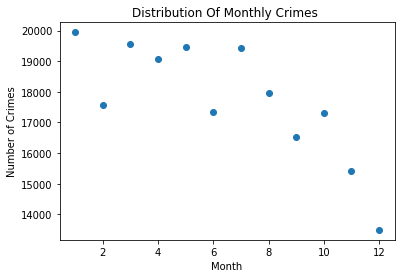

In [126]:
# Distribution Of Monthly Crimes 

plt.scatter(dat.index.month.value_counts().index, dat.index.month.value_counts().values)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Distribution Of Monthly Crimes ')
plt.show()

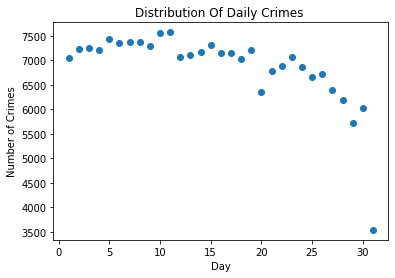

In [127]:
#Distribution Of Daily Crimes 

plt.scatter(dat.index.day.value_counts().index, dat.index.day.value_counts().values)
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.title('Distribution Of Daily Crimes ')
plt.show()

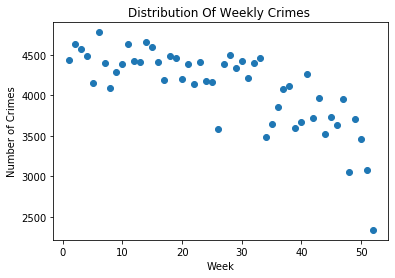

In [159]:
#Distribution Of Weekly Crimes 

plt.scatter(dat.index.week.value_counts().index, dat.index.week.value_counts().values)
plt.xlabel('Week')
plt.ylabel('Number of Crimes')
plt.title('Distribution Of Weekly Crimes ')
plt.show()

In [40]:
len(dat.index.unique())
len(dat.index.value_counts())
dat.index.month.value_counts()
dat.index.week.value_counts()

365

In [122]:
#Top Crimes Per Month
dat.offenses.groupby(dat.index.month).sum()

date
1     CONTROLLED SUBSTANCE,INTENT TOBURGLARY,UNCLASS...
2     ASSAULT 2,1,UNCLASSIFIEDPUBLIC ADMINISTATION,U...
3     FORGERY,ETC.,UNCLASSIFIED-FELOCONTROLLED SUBST...
4     ROBBERY,OPEN AREA UNCLASSIFIEDCRIMINAL MIS 2 &...
5     CRIMINAL CONTEMPT 1ASSAULT 3CRIMINAL CONTEMPT ...
6     CONTROLLED SUBSTANCE, POSSESSIROBBERY,OPEN ARE...
7     ROBBERY,OPEN AREA UNCLASSIFIEDTRAFFIC,UNCLASSI...
8     ASSAULT 2,1,UNCLASSIFIEDCONTROLLED SUBSTANCE, ...
9     CRIMINAL MISCHIEF,UNCLASSIFIED 4NY STATE LAWS,...
10    ASSAULT 3TRESPASS 3, CRIMINALNY STATE LAWS,UNC...
11    LARCENY,PETIT FROM OPEN AREAS,INTOXICATED DRIV...
12    IMPAIRED DRIVING,DRUGFRAUD,UNCLASSIFIED-FELONY...
Name: offenses, dtype: object

In [123]:
da = dat.offenses.resample('M').sum()

In [124]:
da

date
2019-01-31    NY STATE LAWS,UNCLASSIFIED VIOASSAULT 2,1,UNCL...
2019-02-28    TRAFFIC,UNCLASSIFIED MISDEMEANASSAULT 3TRESPAS...
2019-03-31    LARCENY,PETIT FROM OPEN AREAS,CONTROLLED SUBST...
2019-04-30    LARCENY,PETIT FROM OPEN AREAS,ASSAULT 3LARCENY...
2019-05-31    CONTROLLED SUBSTANCE, POSSESSIPUBLIC ADMINISTR...
2019-06-30    LARCENY,PETIT FROM OPEN AREAS,ROBBERY,OPEN ARE...
2019-07-31    PUBLIC ADMINISTRATION,UNCLASSILARCENY,GRAND FR...
2019-08-31    LARCENY,PETIT FROM OPEN AREAS,WEAPONS, POSSESS...
2019-09-30    TRAFFIC,UNCLASSIFIED MISDEMEANASSAULT 2,1,UNCL...
2019-10-31    ASSEMBLY,UNLAWFULBURGLARY,UNCLASSIFIED,UNKNOWN...
2019-11-30    GAMBLING, DEVICE, POSSESSIONUNAUTHORIZED USE V...
2019-12-31    CRIMINAL MISCHIEF,UNCLASSIFIED 4UNAUTHORIZED U...
Freq: M, Name: offenses, dtype: object

## MACHINE LEARNING

In [13]:
from sklearn.preprocessing import LabelEncoder

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
X = data[['offenses', 'AGE_GROUP', 'PERP_RACE', 'PERP_SEX']].values

In [50]:

#X[:,5] = data[['ARREST_PRECINCT']].values
#all_data = np.hstack((X_all, data[['ARREST_PRECINCT', 'JURISDICTION_CODE']].values))

In [51]:
all_data.shape

(213089, 25)

In [64]:
'''
lab_enc = LabelEncoder()
X['offenses'] = lab_enc.fit_transform(X[['offenses']])
#X['ARREST_BORO'] = lab_enc.fit_transform(X[['ARREST_BORO']])
X['AGE_GROUP'] = lab_enc.fit_transform(X[['AGE_GROUP']])
X['PERP_RACE'] = lab_enc.fit_transform(X[['PERP_RACE']])
X['PERP_SEX'] = lab_enc.fit_transform(X[['PERP_SEX']])
'''
lab_enc = LabelEncoder()
X[:,0] = lab_enc.fit_transform(X[:,0])
#X['ARREST_BORO'] = lab_enc.fit_transform(X[['ARREST_BORO']])
X[:,1] = lab_enc.fit_transform(X[:,1])
X[:,2] = lab_enc.fit_transform(X[:,2])
X[:,3] = lab_enc.fit_transform(X[:,3])

In [49]:
#enc = OneHotEncoder(handle_unknown='ignore')
#X_all = enc.fit_transform(X).toarray()

In [52]:
#all_data = np.hstack((X_all, data[['ARREST_PRECINCT', ]].values)) 

In [77]:
np.unique(lab_enc.fit_transform(data['offense_type'].values))

array([0, 1, 2, 3])

In [78]:
np.unique(lab_enc.inverse_transform(y))

array(['F', 'I', 'M', 'V'], dtype=object)

In [71]:
data['offense_type'].unique()

array(['M', 'F', 'V', 'I'], dtype=object)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [79]:
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split( X_train_all, y_train_all, test_size=0.2, random_state=42)

log = LogisticRegression(solver='lbfgs', multi_class='multinomial')
log.fit(X_train, y_train)
y_pred = log.predict(X_train)
print(classification_report(y_train, y_pred, target_names=['F', 'I', 'M', 'V']))
print('training accuracy: ', accuracy_score(y_train, y_pred))

C:\Users\bible_000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bible_000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           F       0.17      0.00      0.00     53374
           I       0.00      0.00      0.00       273
           M       0.59      1.00      0.74     80917
           V       0.00      0.00      0.00      1812

    accuracy                           0.59    136376
   macro avg       0.19      0.25      0.19    136376
weighted avg       0.42      0.59      0.44    136376

training accuracy:  0.5933082067225904


In [80]:
log_y_pred_val = log.predict(X_val)
print('Logistic Validation accuracy: ', accuracy_score(y_val, log_y_pred_val))
print(classification_report(y_val, log_y_pred_val, target_names=['F', 'I', 'M', 'V']))

Logistic Validation accuracy:  0.5940753776213521


C:\Users\bible_000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           F       0.00      0.00      0.00     13314
           I       0.00      0.00      0.00        69
           M       0.59      1.00      0.75     20255
           V       0.00      0.00      0.00       457

    accuracy                           0.59     34095
   macro avg       0.15      0.25      0.19     34095
weighted avg       0.35      0.59      0.44     34095



In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)
print('knn training accuracy: ', accuracy_score(y_train, y_pred_knn))
print(classification_report(y_train, y_pred_knn, target_names=['F', 'I', 'M', 'V']))

knn training accuracy:  0.9851806769519563
              precision    recall  f1-score   support

           F       0.99      0.97      0.98     53374
           I       0.90      0.38      0.53       273
           M       0.98      1.00      0.99     80917
           V       0.99      0.99      0.99      1812

    accuracy                           0.99    136376
   macro avg       0.97      0.83      0.87    136376
weighted avg       0.99      0.99      0.98    136376



In [82]:
y_pred_knn = knn.predict(X_val)
print('knn validaton accuracy: ', accuracy_score(y_val, y_pred_knn))
print(classification_report(y_val, y_pred_knn, target_names=['F', 'I', 'M', 'V']))

knn validaton accuracy:  0.9834873148555506
              precision    recall  f1-score   support

           F       0.99      0.97      0.98     13314
           I       0.90      0.26      0.40        69
           M       0.98      1.00      0.99     20255
           V       0.98      0.98      0.98       457

    accuracy                           0.98     34095
   macro avg       0.96      0.80      0.84     34095
weighted avg       0.98      0.98      0.98     34095



In [83]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=10)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_train)
print('svc training accuracy: ', accuracy_score(y_train, y_pred_svc))
print(classification_report(y_train, y_pred_svc, target_names=['F', 'I', 'M', 'V']))

C:\Users\bible_000\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


svc training accuracy:  0.5933375373966093


C:\Users\bible_000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           F       0.00      0.00      0.00     53374
           I       0.00      0.00      0.00       273
           M       0.59      1.00      0.74     80917
           V       0.00      0.00      0.00      1812

    accuracy                           0.59    136376
   macro avg       0.15      0.25      0.19    136376
weighted avg       0.35      0.59      0.44    136376



In [84]:
y_pred_svc_val = svc.predict(X_val)
print('svc validation accuracy: ', accuracy_score(y_val, y_pred_svc_val))
print(classification_report(y_val, y_pred_svc_val, target_names=['F', 'I', 'M', 'V']))

svc validation accuracy:  0.5940753776213521
              precision    recall  f1-score   support

           F       0.00      0.00      0.00     13314
           I       0.00      0.00      0.00        69
           M       0.59      1.00      0.75     20255
           V       0.00      0.00      0.00       457

    accuracy                           0.59     34095
   macro avg       0.15      0.25      0.19     34095
weighted avg       0.35      0.59      0.44     34095



C:\Users\bible_000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_train)
print('Random forest training accuracy: ', accuracy_score(y_train, y_pred_rfc))
print(classification_report(y_train, y_pred_rfc, target_names=['F', 'I', 'M', 'V']))

Random forest training accuracy:  0.9879817563207602
              precision    recall  f1-score   support

           F       1.00      0.97      0.99     53374
           I       0.94      0.48      0.63       273
           M       0.98      1.00      0.99     80917
           V       1.00      1.00      1.00      1812

    accuracy                           0.99    136376
   macro avg       0.98      0.86      0.90    136376
weighted avg       0.99      0.99      0.99    136376



In [88]:
y_pred_rfc_val = rfc.predict(X_val)
print('Random forest validation accuracy: ', accuracy_score(y_val, y_pred_rfc_val))
print(classification_report(y_val, y_pred_rfc_val, target_names=['F', 'I', 'M', 'V']))

Random forest validation accuracy:  0.9833406657867723
              precision    recall  f1-score   support

           F       0.99      0.97      0.98     13314
           I       0.78      0.26      0.39        69
           M       0.98      1.00      0.99     20255
           V       0.97      0.96      0.96       457

    accuracy                           0.98     34095
   macro avg       0.93      0.80      0.83     34095
weighted avg       0.98      0.98      0.98     34095



In [89]:
rfc.feature_importances_

array([0.97549861, 0.01227386, 0.00716318, 0.00506434])

## Examining using Locations data

In [1]:
### taking a long time to set up geopandas. I had to unistall Anaconda and install it back
### My computer still trying configure geopandas. 


In [14]:
import fiona
import rtree
import pyproj
import shapely

In [284]:
import geopandas as gpd

In [133]:
data_geo = gpd.GeoDataFrame(dat, geometry=gpd.points_from_xy(dat.Longitude, dat.Latitude))

In [136]:
data_geo.head()

,ARREST_DATE,offenses,OFNS_DESC,offense_type,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,geometry
date,,,,,,,,,,,,,,,
2019-12-31,12/31/2019,"IMPAIRED DRIVING,DRUG",INTOXICATED & IMPAIRED DRIVING,M,M,33,0,25-44,M,WHITE,1000916,245710,40.841085,-73.939769,POINT (-73.93977 40.84108)
2019-12-31,12/31/2019,"FRAUD,UNCLASSIFIED-FELONY",THEFT-FRAUD,F,Q,101,0,25-44,M,BLACK HISPANIC,1055868,156522,40.596012,-73.742116,POINT (-73.74212 40.59601)
2019-12-31,12/31/2019,"HOMICIDE, NEGLIGENT, VEHICLE,",HOMICIDE-NEGLIGENT-VEHICLE,F,M,23,0,18-24,M,BLACK,997462,227024,40.789803,-73.952289,POINT (-73.95229 40.78980)
2019-12-31,12/31/2019,CRIMINAL MIS 2 & 3,CRIMINAL MISCHIEF & RELATED OF,F,S,120,0,18-24,M,BLACK,962822,174282,40.645023,-74.077217,POINT (-74.07722 40.64502)
2019-12-31,12/31/2019,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,M,25,97,25-44,M,BLACK,1004138,226326,40.787875,-73.928182,POINT (-73.92818 40.78787)


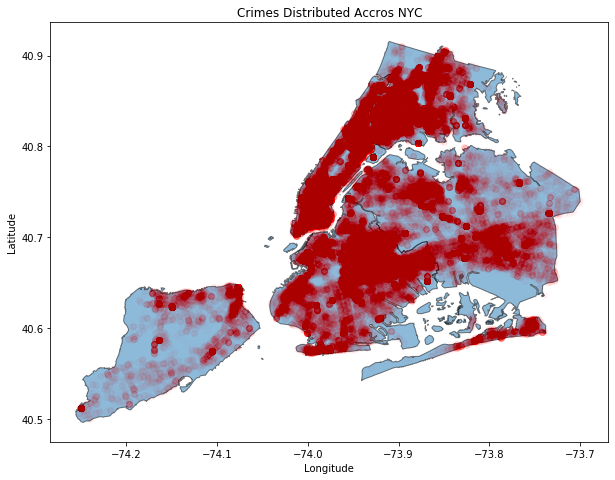

In [160]:
ny_boroughs = gpd.read_file(gpd.datasets.get_path('nybb')).to_crs("EPSG:4326")
ax = ny_boroughs.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
data_geo.plot(ax=ax, alpha=0.01, color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crimes Distributed Accros NYC')
plt.show()

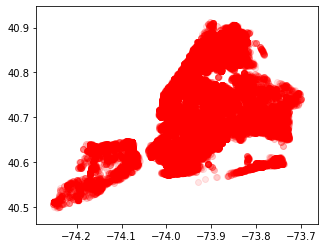

In [157]:
data_geo.plot(alpha=0.1, color='red')

plt.show()

In [359]:
data_always = gpd.GeoDataFrame(test_1, geometry=gpd.points_from_xy(test_1.longitude, test_1.latitude))

In [376]:
data_always[data_always.latitude > 40.85] 

,latitude,longitude,geometry
11,40.855803,-73.843910,POINT (-73.84391 40.85580)
32,40.853960,-73.900121,POINT (-73.90012 40.85396)
34,40.887333,-73.847250,POINT (-73.84725 40.88733)
56,40.869407,-73.879998,POINT (-73.88000 40.86941)
57,40.873671,-73.908014,POINT (-73.90801 40.87367)
58,40.853587,-73.900591,POINT (-73.90059 40.85359)
87,40.883120,-73.903321,POINT (-73.90332 40.88312)
98,40.868467,-73.821583,POINT (-73.82158 40.86847)
117,40.851112,-73.935256,POINT (-73.93526 40.85111)


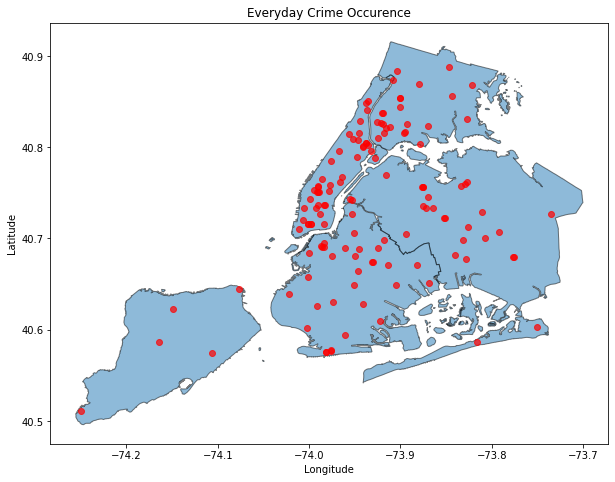

In [363]:
ny_boroughs = gpd.read_file(gpd.datasets.get_path('nybb')).to_crs("EPSG:4326")
ax = ny_boroughs.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
data_always.plot(ax=ax, alpha=0.7, color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Everyday Crime Occurence')
plt.show()

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
from sklearn.model_selection import train_test_split

In [169]:
data_geo_Manh = data_geo[data_geo['ARREST_BORO']=='M']

In [171]:
data_geo_Manh.tail()

,ARREST_DATE,offenses,OFNS_DESC,offense_type,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,geometry
date,,,,,,,,,,,,,,,
2019-01-01,01/01/2019,"LARCENY,GRAND FROM PERSON,UNCL",GRAND LARCENY,F,M,6,0,25-44,M,BLACK,981783,208203,40.738154,-74.008904,POINT (-74.00890 40.73815)
2019-01-01,01/01/2019,"INTOXICATED DRIVING,ALCOHOL",INTOXICATED/IMPAIRED DRIVING,F,M,7,0,25-44,M,WHITE,987931,200118,40.715962,-73.986723,POINT (-73.98672 40.71596)
2019-01-01,01/01/2019,"PUBLIC HEALTH LAW,UNCLASSIFIED",OTHER STATE LAWS (NON PENAL LA,M,M,14,0,25-44,M,WHITE,986713,212638,40.750327,-73.991112,POINT (-73.99111 40.75033)
2019-01-01,01/01/2019,"BURGLARY,UNCLASSIFIED,UNKNOWN",BURGLARY,F,M,19,0,25-44,M,BLACK,994297,218680,40.766905,-73.963731,POINT (-73.96373 40.76691)
2019-01-01,01/01/2019,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",CRIMINAL MISCHIEF & RELATED OF,M,M,18,0,25-44,M,WHITE,986665,217198,40.762843,-73.991284,POINT (-73.99128 40.76284)


In [208]:
X = data_geo_Manh.index.values
y = data_geo_Manh.Longitude.values

In [209]:
lab_enc = LabelEncoder()
X = lab_enc.fit_transform(X)

In [210]:
X_train_all, X_test, y_train_all, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split( X_train_all, y_train_all, test_size=0.2, random_state=42)

linear_model = LinearRegression()

In [217]:
linear_model.fit(X_train.reshape(-1,1), y_train)
#y_pred = log.predict(X_train)
#print('training accuracy: ', accuracy_score(y_train, y_pred))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [218]:
y_pred = linear_model.predict(X_val.reshape(-1,1))
#print('training accuracy: ', accuracy_score(y_train, y_pred))

In [219]:
linear_model.coef_

array([-5.49747e-06])

In [220]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_val, y_pred)

0.0006731844336789194

In [221]:
mean_squared_error(y_val, y_pred)

0.00062396745413089

In [95]:
dat.head()

,ARREST_DATE,offenses,OFNS_DESC,offense_type,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
date,,,,,,,,,,,,,,
2019-12-31,12/31/2019,"IMPAIRED DRIVING,DRUG",INTOXICATED & IMPAIRED DRIVING,M,M,33,0,25-44,M,WHITE,1000916,245710,40.841085,-73.939769
2019-12-31,12/31/2019,"FRAUD,UNCLASSIFIED-FELONY",THEFT-FRAUD,F,Q,101,0,25-44,M,BLACK HISPANIC,1055868,156522,40.596012,-73.742116
2019-12-31,12/31/2019,"HOMICIDE, NEGLIGENT, VEHICLE,",HOMICIDE-NEGLIGENT-VEHICLE,F,M,23,0,18-24,M,BLACK,997462,227024,40.789803,-73.952289
2019-12-31,12/31/2019,CRIMINAL MIS 2 & 3,CRIMINAL MISCHIEF & RELATED OF,F,S,120,0,18-24,M,BLACK,962822,174282,40.645023,-74.077217
2019-12-31,12/31/2019,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,M,25,97,25-44,M,BLACK,1004138,226326,40.787875,-73.928182


In [170]:
da = dat.groupby(dat.index.month)['Latitude', 'Longitude'] #dat[['Latitude']]

C:\Users\bible_000\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [138]:
da.head()

,Latitude,Longitude
date,,
2019-12-31,40.841085,-73.939769
2019-12-31,40.596012,-73.742116
2019-12-31,40.789803,-73.952289
2019-12-31,40.645023,-74.077217
2019-12-31,40.787875,-73.928182


In [150]:
df =  dat.resample('D')['ARREST_DATE', 'Latitude', 'Longitude']

In [171]:
df1 = dat[['Latitude']]

In [371]:
#dat.index.week.value_counts().index(dat[['Latitude']])
dff = dat.groupby(dat.index.day)['Latitude']
dff_final = dff.unique().values


In [373]:
for i in range(1,31):
    
    b = set(dff_final[i])
    if i == 1:
        c = set(dff_final[0]).intersection(b)
        
    else:
        c = c.intersection(b)
        
    print('Day ', i, len(c))

 
    

Day  1 881
Day  2 464
Day  3 343
Day  4 288
Day  5 251
Day  6 236
Day  7 222
Day  8 215
Day  9 209
Day  10 202
Day  11 200
Day  12 198
Day  13 182
Day  14 179
Day  15 175
Day  16 170
Day  17 167
Day  18 165
Day  19 162
Day  20 161
Day  21 158
Day  22 155
Day  23 152
Day  24 150
Day  25 149
Day  26 148
Day  27 146
Day  28 143
Day  29 139
Day  30 133


In [353]:
test = list()
for i in c:
    g = dat['Longitude'][dat['Latitude'] == i]
    gg = g.unique()
    location_plot = i, g[0]
    test.append(location_plot)
    #print(i, g.unique())
    #print(location_plot)

In [357]:
np.shape(test)
#a.tail()
test_1 = pd.DataFrame(test, columns=['latitude', 'longitude'])

In [358]:
test_1.head()

,latitude,longitude
0,40.726965,-73.953117
1,40.814853,-73.956313
2,40.689648,-73.924054
3,40.758232,-73.977431
4,40.735331,-73.875451


In [226]:
dff_final = pd.DataFrame(dff_final)

In [237]:
final = dff_final.T

In [283]:
from sklearn.cluster import KMeans
#data['ARREST_DATE'] = lab_enc.fit_transform(data['ARREST_DATE'])
#kmeans = KMeans(random_state=42).fit(data[['ARREST_DATE', 'Latitude']]) 

#kmeans = KMeans(random_state=42).fit(final) 

In [159]:
X_clusters = kmeans.predict(data[['ARREST_DATE', 'Latitude']])
X_clusters_centers = kmeans.cluster_centers_

In [160]:
print(X_clusters_centers)

[[201.60743293  40.73780454]
 [ 64.74792632  40.73865117]
 [336.92146069  40.73812887]
 [109.17845036  40.73817115]
 [290.83223086  40.73853646]
 [154.92214077  40.73665101]
 [ 20.73355812  40.73833046]
 [246.61978807  40.7385324 ]]


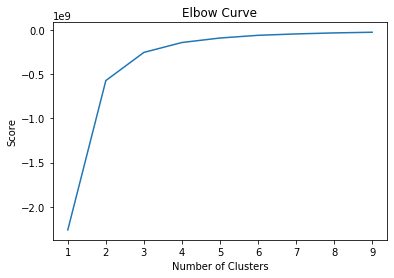

In [161]:
#from sklearn.cluster import KMeans


clust = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in clust]
score = [kmeans[i].fit(data[['ARREST_DATE', 'Latitude']]).score(data[['ARREST_DATE', 'Latitude']]) for i in range(len(kmeans))]
 
plt.plot(clust,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()